In [4]:
# Install dependencies
import tensorflow as tf
import cv2
import matplotlib
import os
import imghdr

Used a **'Download all images'** chrome extension to download images of cats and dogs for creating our own dataset of images. Removed images of less than 10 kb manually. Added the dataset in input by creating a zip file. The code below is to remove dodgy images from our dataset.

In [12]:
data_dir = '/kaggle/input/cats-and-dogs/data'
image_exts = ['jpeg','jpg', 'bmp', 'png', 'webp'] # valid file extensions
os.listdir(data_dir)

['Dogs', 'Cats']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
#             os.remove(image_path)

Image not in ext list /kaggle/input/cats-and-dogs/data/Dogs/640px-Huskiesatrest.jpg
Issue with image /kaggle/input/cats-and-dogs/data/Dogs/640px-Huskiesatrest.jpg
Image not in ext list /kaggle/input/cats-and-dogs/data/Dogs/GoldenRetrieversdanspetcare.jpeg
Issue with image /kaggle/input/cats-and-dogs/data/Dogs/GoldenRetrieversdanspetcare.jpeg
Image not in ext list /kaggle/input/cats-and-dogs/data/Dogs/labrador_puppy_harefield_dogstrust.jpg
Issue with image /kaggle/input/cats-and-dogs/data/Dogs/labrador_puppy_harefield_dogstrust.jpg
Image not in ext list /kaggle/input/cats-and-dogs/data/Dogs/bordercolliedog_outside_dogstrust.jpg
Issue with image /kaggle/input/cats-and-dogs/data/Dogs/bordercolliedog_outside_dogstrust.jpg
Image not in ext list /kaggle/input/cats-and-dogs/data/Dogs/essay-final-gettyimages-685469924.jpg
Issue with image /kaggle/input/cats-and-dogs/data/Dogs/essay-final-gettyimages-685469924.jpg
Image not in ext list /kaggle/input/cats-and-dogs/data/Dogs/fluffy-dog-breeds-thr

#### Loading Data

In [86]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/cats-and-dogs/data')

Found 183 files belonging to 2 classes.


In [87]:
data_iterator = data.as_numpy_iterator()

In [90]:
batch = data_iterator.next()

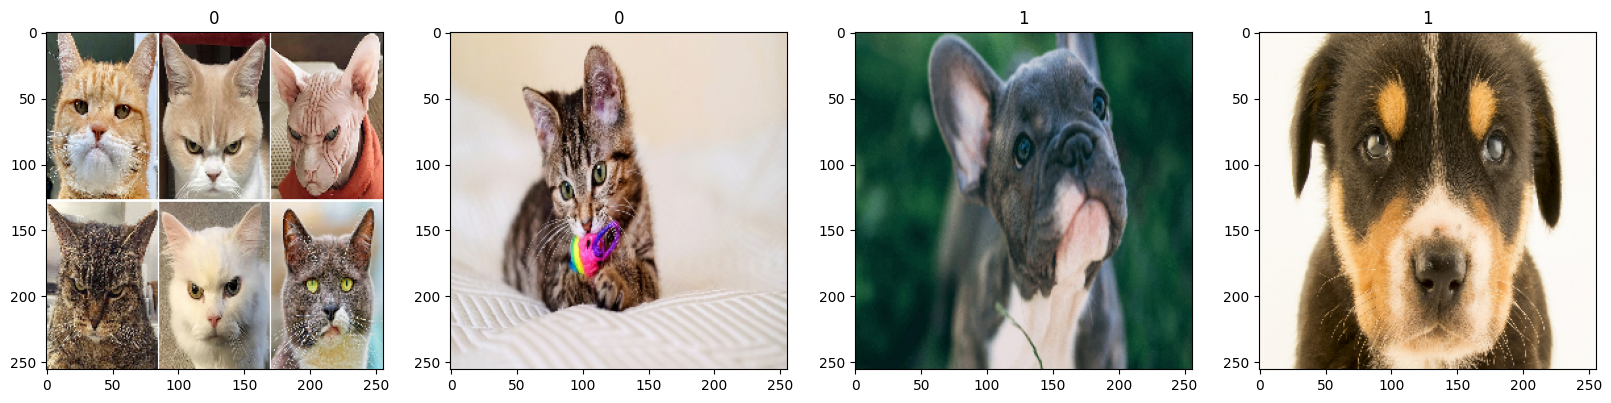

In [91]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# cats = 0, dogs =1

In [92]:
data = data.map(lambda x,y: (x/255, y))

In [93]:
data.as_numpy_iterator().next()

(array([[[[0.9342218 , 0.944087  , 0.94016546],
          [0.92270124, 0.95537734, 0.92855394],
          [0.90549266, 0.9486299 , 0.8903272 ],
          ...,
          [0.79945284, 0.8661195 , 0.6935705 ],
          [0.813511  , 0.8810662 , 0.7175542 ],
          [0.79803395, 0.8813979 , 0.746931  ]],
 
         [[0.93125   , 0.94696784, 0.9488516 ],
          [0.9005347 , 0.9419424 , 0.91314054],
          [0.8637609 , 0.9148639 , 0.84182465],
          ...,
          [0.8146317 , 0.88129836, 0.70874935],
          [0.81960785, 0.88235295, 0.7294118 ],
          [0.8148591 , 0.89024156, 0.759712  ]],
 
         [[0.91914827, 0.9426777 , 0.93201596],
          [0.8775429 , 0.92815566, 0.8868083 ],
          [0.7959774 , 0.86656564, 0.77575684],
          ...,
          [0.8288909 , 0.892739  , 0.72441787],
          [0.82101715, 0.88376224, 0.7336397 ],
          [0.8356924 , 0.90131307, 0.7756434 ]],
 
         ...,
 
         [[0.90149164, 0.9141448 , 0.9248985 ],
          [0.90723

#### Splitting data into training, test and Validation set

In [94]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) +1

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [49]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### Model Building

This model is for Binary Classification task.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Deep explaination given in last.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
logdir='logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4396 - loss: 1.0520 - val_accuracy: 0.3438 - val_loss: 0.8006
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4833 - loss: 0.7140 - val_accuracy: 0.4375 - val_loss: 0.6843
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6021 - loss: 0.6850 - val_accuracy: 0.6562 - val_loss: 0.6754
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8302 - loss: 0.6736 - val_accuracy: 0.6875 - val_loss: 0.6646
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7927 - loss: 0.6509 - val_accuracy: 0.8750 - val_loss: 0.6098
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8521 - loss: 0.6018 - val_accuracy: 0.8438 - val_loss: 0.5053
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7448 - loss: 0.5478 - val_accuracy: 0.8750 - val_loss: 0.4835
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7698 - loss: 0.5041 - val_accuracy: 0.9062 - val_loss: 0.4332
Epoch 9/20
4/4

#### Explianing Params
This aboveo code is used to train a neural network model using the provided training data. The params are as follows:

*   **hist = model.fit(...):**
    
    *   fit is a method that trains the model for a fixed number of epochs (iterations over the entire dataset).
        
    *   The output of fit is stored in hist, which will contain training history, including loss and accuracy values over the epochs.
        
*   **train:**
    
    *   This is the training dataset. It typically includes both the input data (e.g., images) and the corresponding labels (e.g., categories).
        
*   **epochs=20:**
    
    *   This specifies the number of times the model will go through the entire training dataset. In this case, the model will be trained for 20 epochs.
        
*   **validation\_data=val:**
    
    *   This is the validation dataset, which is used to evaluate the model's performance after each epoch. The model does not train on this data; it just checks how well it generalizes to unseen data.
        
*   **callbacks=\[tensorboard\_callback\]:**
    
    *   callbacks are optional functions that can be executed during training.
        
    *   tensorboard\_callback is likely used to log details about the training process, which can be visualized in TensorBoard, a tool for tracking and visualizing metrics such as loss and accuracy during training.

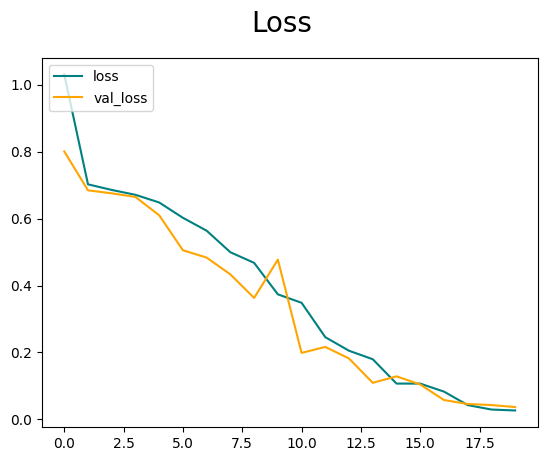

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

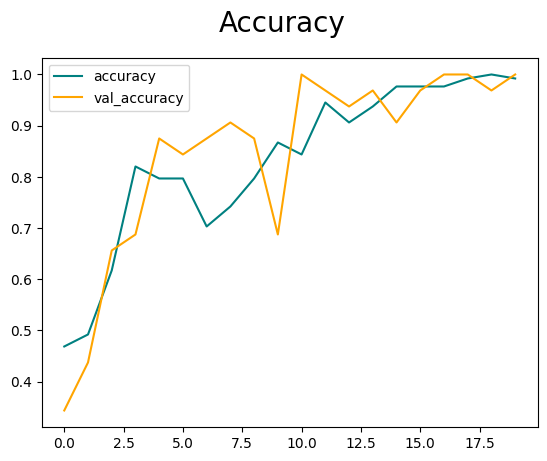

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### Evaluation

In [63]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [64]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

**Precision** tells us the percentage of the positive predictions that were correct. If the model predicts 10 cases as positive and 8 of them are actually positive, precision is 80%.

**Recall** tells us the percentage of the actual positive cases that were correctly identified by the model. If there are 20 actual positives and the model correctly identifies 15, recall is 75%.
    
**Binary Accuracy** measures how often the model's predictions (both positive and negative) are correct overall. If the model made 100 predictions and 90 were correct, the accuracy is 90%.

In [65]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


These lines update the precision, recall, and accuracy metrics with the new predictions (yhat) and the true labels (y). The metrics are updated for each batch of data as the loop continues.

In [66]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### We are downloading images here from browser for cat or dog and checking it for this model.

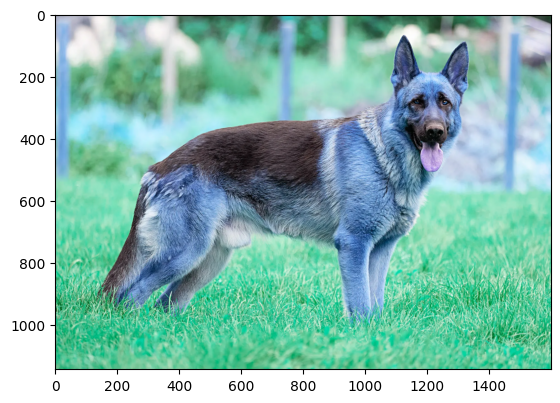

In [81]:
# img = cv2.imread('/kaggle/input/images-to-check/catimage.jpg')
img = cv2.imread('/kaggle/input/images-check/dog.webp')
plt.imshow(img)
plt.show()

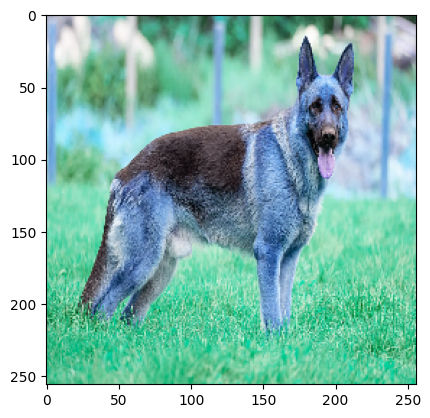

In [82]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [83]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [84]:
yhat


array([[0.99889237]], dtype=float32)

In [85]:
if yhat > 0.5: 
    print(f'Predicted class is Dogs')
else:
    print(f'Predicted class is Cats')

Predicted class is Dogs


### Model layers description:::

### 1\. **Input Layer**

*   input\_shape=(256,256,3):
    
    *   This layer expects images of size 256x256 pixels with 3 channels (indicating that the images are in color, typically RGB).
        

### 2\. **First Convolutional Layer**

*   Conv2D(16, (3,3), 1, activation='relu'):
    
    *   **16 Filters**: The model uses 16 filters to scan the image. Each filter is a small 3x3 matrix that slides over the image.
        
    *   **(3,3) Kernel Size**: The size of the filter is 3x3 pixels.
        
    *   **Stride 1**: The filter moves 1 pixel at a time across the image.
        
    *   **ReLU Activation**: The ReLU function (Rectified Linear Unit) is applied, which helps introduce non-linearity to the model by converting all negative values to zero.
        
    *   **Output**: The result is a set of 16 feature maps that highlight different aspects of the image, such as edges or textures.
        

### 3\. **First Max Pooling Layer**

*   MaxPooling2D():
    
    *   This layer reduces the spatial dimensions (width and height) of the feature maps by taking the maximum value from each 2x2 block of pixels, effectively downsampling the image by half. This reduces the amount of computation in later layers and helps the model focus on the most important features.
        

### 4\. **Second Convolutional Layer**

*   Conv2D(32, (3,3), 1, activation='relu'):
    
    *   **32 Filters**: This layer uses 32 filters to detect more complex patterns in the downsampled feature maps.
        
    *   **Output**: The feature maps become more abstract, focusing on more complex patterns, like corners or combinations of edges.
        

### 5\. **Second Max Pooling Layer**

*   MaxPooling2D():
    
    *   Again, the spatial dimensions of the feature maps are reduced by half, making the feature maps smaller and more focused on the key features of the image.
        

### 6\. **Third Convolutional Layer**

*   Conv2D(16, (3,3), 1, activation='relu'):
    
    *   **16 Filters**: This layer uses fewer filters than the previous convolutional layer. It continues to refine the features extracted from the previous layers.
        
    *   **Output**: The resulting feature maps are even more focused on specific patterns that may be important for classification.
        

### 7\. **Third Max Pooling Layer**

*   MaxPooling2D():
    
    *   Once more, this layer reduces the size of the feature maps, making them smaller and more manageable for the next layers.
        

### 8\. **Flatten Layer**

*   Flatten():
    
    *   This layer converts the 2D feature maps into a 1D vector. This step is necessary because the next layers (Dense layers) expect a 1D input.
        
    *   **Purpose**: The flattened vector contains all the important features extracted by the convolutional and pooling layers and prepares them for classification.
        

### 9\. **First Dense Layer**

*   Dense(256, activation='relu'):
    
    *   **256 Neurons**: This fully connected (Dense) layer has 256 neurons. Each neuron is connected to every value in the flattened vector.
        
    *   **ReLU Activation**: The ReLU function is used again to introduce non-linearity, helping the model learn complex patterns.
        

### 10\. **Output Dense Layer**

*   Dense(1, activation='sigmoid'):
    
    *   **1 Neuron**: The final layer has 1 neuron because this is a binary classification problem (e.g., cat vs. dog, positive vs. negative).
        
    *   **Sigmoid Activation**: The sigmoid function outputs a value between 0 and 1, representing the probability that the input image belongs to a particular class.